<a href="https://colab.research.google.com/github/ronaldolg26/Estudos_para_DataScience/blob/main/EXEMPLOS_DO_LIVRO_CAPITULO_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from IPython.display import Image, display

# FUNÇÃO MERGE -- Junção de Dataframes

### Muitos para um (inner, left, right, outer)

In [ ]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],'data1': range(7)})

In [ ]:
df2 = pd.DataFrame({'key': ['a', 'b', 'd'], 'data2': range(3)})

In [ ]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [ ]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [ ]:
# MERGE sem coluna especifica para fazer a junção entre os DF irá juntar apenas aqueles indices
# similares nos dois DF e repetirar o valores na coluna do DF que não suprir todas. Veja o exemplo do DF1 e DF2 e sua junção
pd.merge(df1,df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [ ]:
# Com especificação da coluna q se deseja o merge
pd.merge(df1,df2, on="key")

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [ ]:
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],'data1': range(7)})
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'], 'data2': range(3)})

In [ ]:
df3

,lkey,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [ ]:
df4

,rkey,data2
0,a,0
1,b,1
2,d,2


In [ ]:
# Com especificaão da coluna mas com nome diferentes nos datafrfames. Os valores são iguais, mas o nom da coluna é diferente
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


Por padrão a Junçao feita pelo MERGE é do tipo ``INNER``, ou seja, pega a ``interseção`` etre os dois DF.

Existe outros paramentro ``left`` ``right`` e ``outer``.

A junção externa (``outer`` join) efetua a união das chaves, combinando o efeito da aplicação das junções tanto à esquerda quanto à direita:

In [ ]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [ ]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [ ]:
pd.merge(df1, df2, how='outer')

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


Obeserve que há 3 ocorrencias de B em DATA 1 com valores diferentes e que corre apenas 1 ocorrência de B em DATA 2, ``então a função colocará na coluna de Data 2 3 repetiçoes do seu valor``



Para os valores onde não á interseção, ou seja, os indices não estão em ambos os dataframes, ele coloca o ``NaN``

----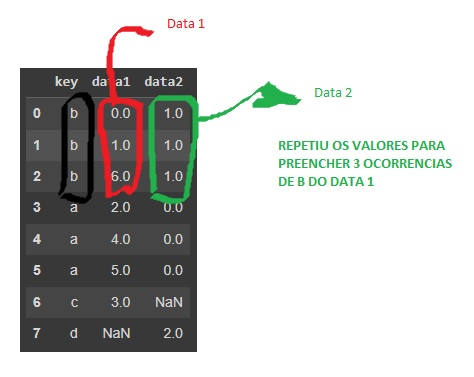

### Muitos para muitos (Many-to-Many)

In [2]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],'data1': range(6)})
df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],'data2': range(5)})

In [3]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [4]:
df2

,key,data2
0,a,0
1,b,1
2,a,2
3,b,3
4,d,4


In [ ]:
pd.merge(df1, df2, on='key', how='left')

,key,data1,data2
0,b,0,1.0
1,b,0,3.0
2,b,1,1.0
3,b,1,3.0
4,a,2,0.0
5,a,2,2.0
6,c,3,NaN
7,a,4,0.0
8,a,4,2.0
9,b,5,1.0


Junções de muitos para muitos formam o produto cartesiano das
linhas. Como havia três linhas 'b' no DataFrame da esquerda e duas
no da direita, há seis linhas 'b' no resultado. O método de junção
afeta somente os valores de chaves distintos que aparecem no
resultado

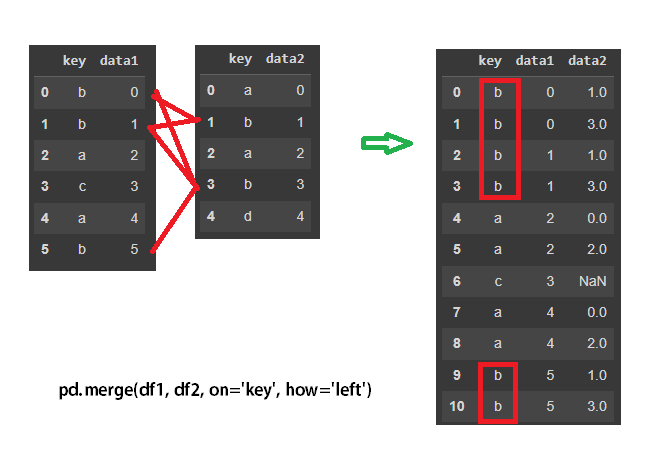

In [ ]:
# URL da imagem que você deseja exibir
url = "https://raw.githubusercontent.com/ronaldolg26/Estudos_para_DataScience/main/merge_left.png"

# Exibe a imagem usando a função display da IPython
display(Image(url))

In [5]:
pd.merge(df1, df2, on='key', how='inner')

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


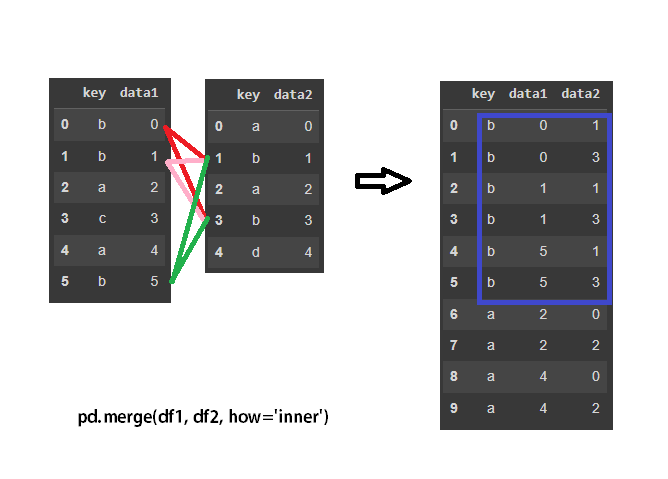

In [10]:
url = "https://raw.githubusercontent.com/ronaldolg26/Estudos_para_DataScience/main/merge_inner.png"
display(Image(url))

----

```
# Merge com Várias Chave
```



In [11]:
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],
                     'key2': ['one', 'two', 'one'],
                     'lval': [1, 2, 3]})

right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                      'key2': ['one', 'one', 'one', 'two'],
                      'rval': [4, 5, 6, 7]})

In [12]:
left

,key1,key2,lval
0,foo,one,1
1,foo,two,2
2,bar,one,3


In [13]:
right

,key1,key2,rval
0,foo,one,4
1,foo,one,5
2,bar,one,6
3,bar,two,7


In [14]:
pd.merge(left, right, on=['key1', 'key2'], how='outer')

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


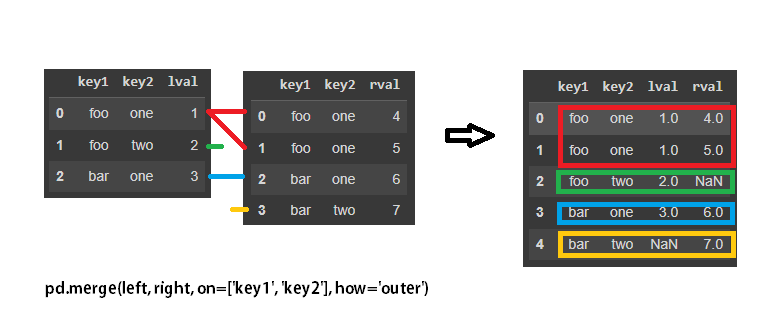

In [15]:
url = "https://raw.githubusercontent.com/ronaldolg26/Estudos_para_DataScience/main/merge_2_key.png"
display(Image(url))

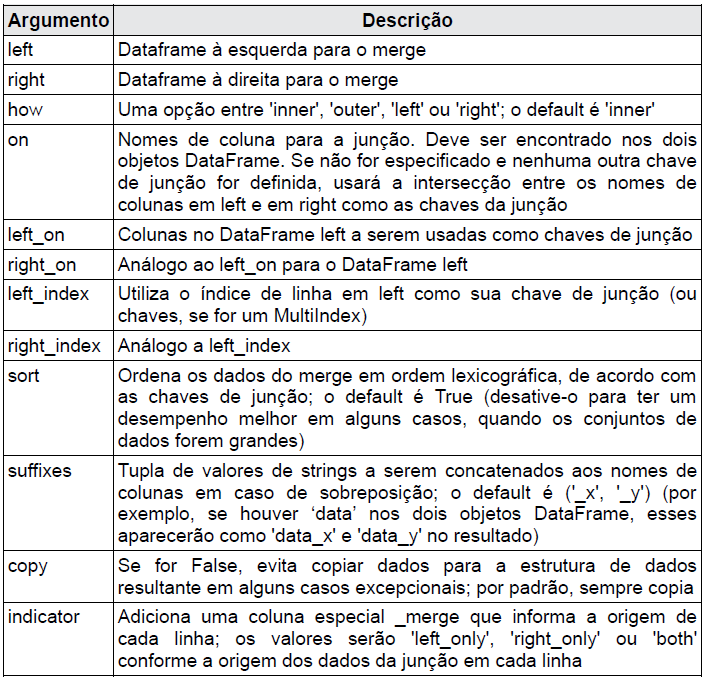

In [16]:
#RESUMO
display(Image("https://raw.githubusercontent.com/ronaldolg26/Estudos_para_DataScience/main/resumo_merge.png"))